<a href="https://colab.research.google.com/github/prathameshsoonad/Machine-learning/blob/main/Assignment_rohit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Mean Squared Error: 33596915.85136148
R-squared Score: 0.7835929767120722


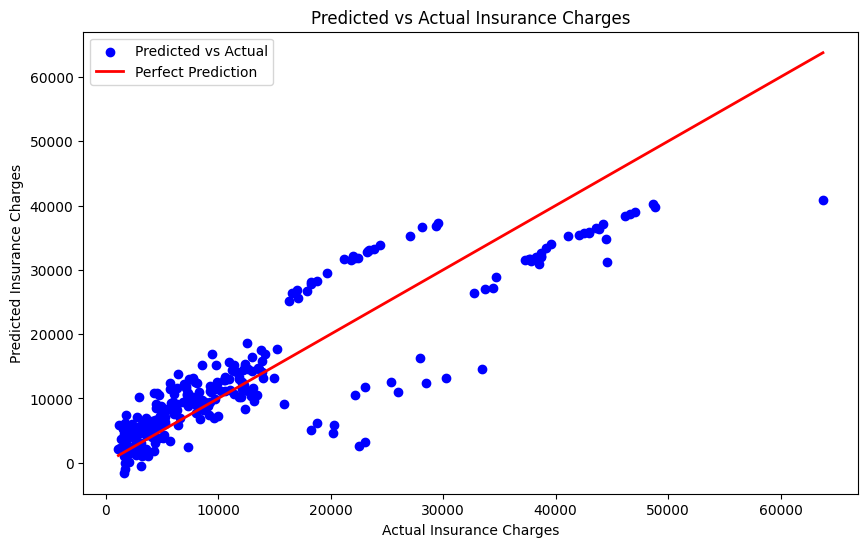

Predicted Insurance Charges: 25988.738723957176


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
data = pd.read_csv('/insurance_data - insurance_data.csv')

# Display the first few rows of the data
print(data.head())

# Step 2: Data Preprocessing
# Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

# Separating features and target variable
X = data.drop(columns=['charges'])
y = data['charges']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Predicted vs Actual Insurance Charges')
plt.legend()
plt.show()

# Step 6: Predict insurance charges for a new data point
# Example: Predict insurance charges given a new data point (replace with actual values)
# Note: Ensure that the order of the features in the new data point matches the order in the training data
# Example data point: [age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest]
new_data_point = np.array([[19, 27.9, 0, 1, 1, 0, 0, 0]])  # Example values
new_data_point_scaled = scaler.transform(new_data_point)
predicted_charges = model.predict(new_data_point_scaled)
print(f'Predicted Insurance Charges: {predicted_charges[0]}')

Mean Squared Error: 48.36033475245703
R-squared Score: -4.373370528050781


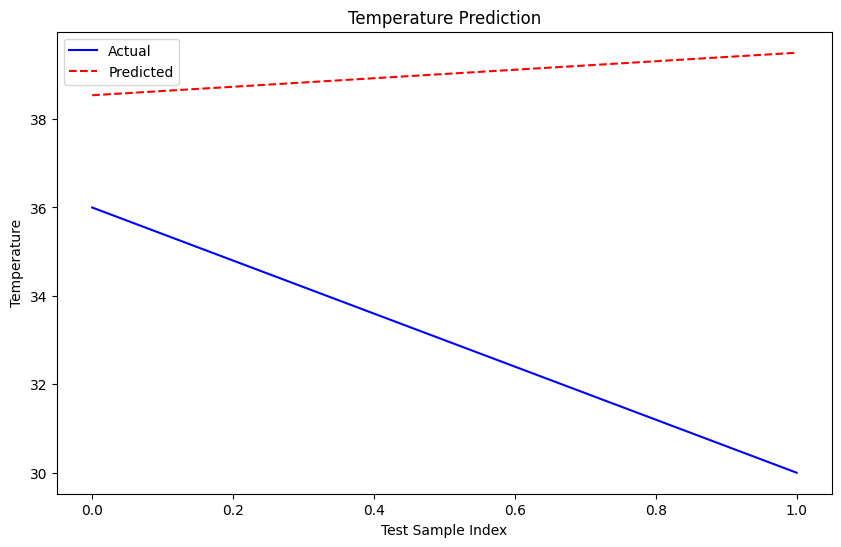

Predicted Temperature: 37.095717884130984


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#question 3

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/content/weather_data - weather_data.csv')

# Step 2: Data Preprocessing
data['x'] = pd.to_datetime(data['x'], format='%d/%m/%y')
data['y'] = data['y'].astype(float)

# Creating lagged features
data['y_prev'] = data['y'].shift(1)
data.dropna(inplace=True)  # Drop the first row with NaN value due to shifting

# Using previous day's temperature (y_prev) to predict current day's temperature (y)
features = data[['y_prev']]
target = data['y']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 4: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred, color='red', linestyle='dashed', label='Predicted')
plt.xlabel('Test Sample Index')
plt.ylabel('Temperature')
plt.title('Temperature Prediction')
plt.legend()
plt.show()

# Step 6: Predict temperature for a new data point
# Example: Predict temperature given previous day's temperature (replace with actual previous day's temperature value)
previous_day_temp = np.array([[35]])  # Example: Previous day's temperature
predicted_temp = model.predict(previous_day_temp)
print(f'Predicted Temperature: {predicted_temp[0]}')

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Coefficient: 9423.815323030976
Intercept: 25321.583011776813


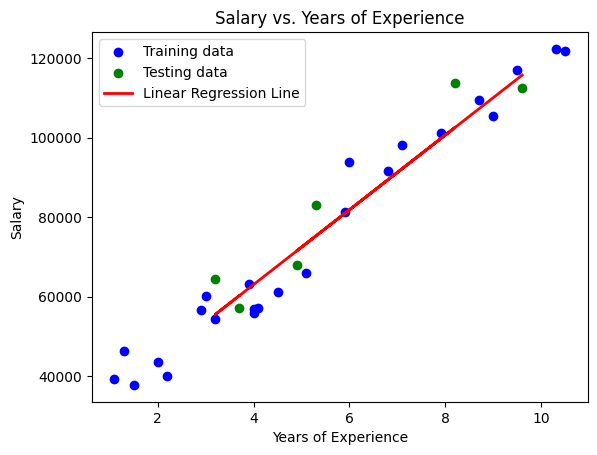

In [ ]:
#question 1
#Write a python code to predict the salary of an employee using linear regression
#based on the data given (salary_info.csv).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
file_path = '/mnt/data/Salary_info - Salary_info (1).csv'

data = pd.read_csv('/content/Salary_info - Salary_info (1).csv')

# Display the first few rows of the dataset
print(data.head())

# Define the independent variable (years of experience) and the dependent variable (salary)
X = data[['YearsExperience']]
y = data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the salaries for the test set
y_pred = model.predict(X_test)

# Print model coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Plotting the results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.legend()
plt.show()

   Year        Value
0  1960  59184116489
1  1961  49557050183
2  1962  46685178504
3  1963  50097303271
4  1964  59062254890
Index(['Year', 'Value'], dtype='object')
Model parameters: a=1.0, b=1.0, c=1.0
R-squared Score: -inf


<ipython-input-26-79f0174303be>:20: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


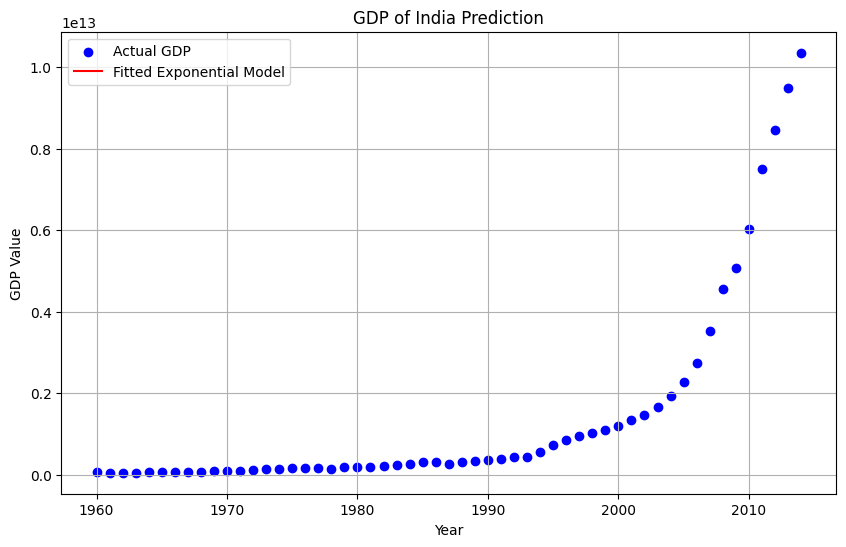

Predicted GDP for the year 2025: inf


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/content/india_gdp - india_gdp.csv')

# Display the first few rows and column names of the data
print(data.head())
print(data.columns)

# Step 2: Data Preprocessing
# Assuming the dataset has columns 'Year' and 'Value' for GDP
X = data['Year'].values
y = data['Value'].values

# Step 3: Define the exponential function
def exponential_model(x, a, b, c):
    return a * np.exp(b * x) + c

# Step 4: Fit the model
params, covariance = curve_fit(exponential_model, X, y)

# Extracting the parameters
a, b, c = params
print(f'Model parameters: a={a}, b={b}, c={c}')

# Step 5: Evaluate the model
y_pred = exponential_model(X, a, b, c)

# Calculate R-squared score (optional)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f'R-squared Score: {r2}')

# Step 6: Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual GDP')
plt.plot(X, y_pred, color='red', label='Fitted Exponential Model')
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title('GDP of India Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Predicting future GDP
# Example: Predict GDP for the year 2025
future_year = 2025
predicted_gdp = exponential_model(future_year, a, b, c)
print(f'Predicted GDP for the year {future_year}: {predicted_gdp}')


  Gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796
Index(['Gender', 'height'], dtype='object')
Mean Squared Error: 7.471556153622154
R-squared Score: 0.49707224434954067


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


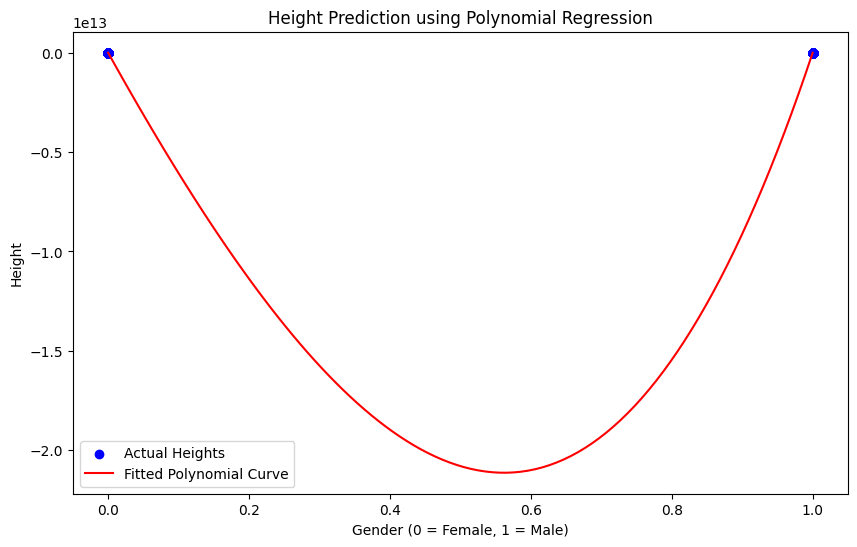

Predicted Height for Female: 63.784974376291245
Predicted Height for Male: 68.95684937629125


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/content/heights - heights.csv')

# Display the first few rows and column names of the data
print(data.head())
print(data.columns)

# Step 2: Data Preprocessing
# The correct column names are 'Gender' and 'height'
gender_column = 'Gender'
height_column = 'height'

# Encode the gender column: Male = 1, Female = 0
data[gender_column] = data[gender_column].map({'Male': 1, 'Female': 0})

# Separating features and target variable
X = data[[gender_column]]
y = data[height_column]

# Step 3: Define polynomial features of degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Step 6: Plotting the results
# Generating values for plotting the polynomial curve
X_plot = np.linspace(X[gender_column].min(), X[gender_column].max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(10, 6))
plt.scatter(data[gender_column], y, color='blue', label='Actual Heights')
plt.plot(X_plot, y_plot, color='red', label='Fitted Polynomial Curve')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Height')
plt.title('Height Prediction using Polynomial Regression')
plt.legend()
plt.show()

# Predicting height for a new data point
# Example: Predict height for a Male (1) and a Female (0)
new_data_points = np.array([[0], [1]])  # Female, Male
new_data_points_poly = poly.transform(new_data_points)
predicted_heights = model.predict(new_data_points_poly)
print(f'Predicted Height for Female: {predicted_heights[0]}')
print(f'Predicted Height for Male: {predicted_heights[1]}')
